In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    classification_report,
    r2_score,
    mean_absolute_error,
    mean_squared_error
)

from xgboost import XGBClassifier
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import re
import string
from textblob import TextBlob

In [5]:
data = pd.read_csv('/content/customer_support_tickets.csv')

In [6]:
data

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [8]:
data.isnull().sum()

,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


Data Frame Creation

In [9]:
print("---- Info ----")
print(data.info())
print("\n---- Describe (numeric) ----")
display(data.describe().T)
print("\n---- Missing values per column ----")
display(data.isnull().sum())
print("\n---- Duplicated rows ----")
print(data.duplicated().sum())

---- Info ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   o

,count,mean,std,min,25%,50%,75%,max
Ticket ID,8469.0,4235.000000,2444.934048,1.0,2118.0,4235.0,6352.0,8469.0
Customer Age,8469.0,44.026804,15.296112,18.0,31.0,44.0,57.0,70.0
Customer Satisfaction Rating,2769.0,2.991333,1.407016,1.0,2.0,3.0,4.0,5.0



---- Missing values per column ----


,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0



---- Duplicated rows ----
0


In [10]:
data.dtypes

,0
Ticket ID,int64
Customer Name,object
Customer Email,object
Customer Age,int64
Customer Gender,object
Product Purchased,object
Date of Purchase,object
Ticket Type,object
Ticket Subject,object
Ticket Description,object


In [11]:
print("Unique counts per column")
display(data.nunique().head())



numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns: ", numerical_cols)
print("Categorical columns: ", categorical_cols)

Unique counts per column


,0
Ticket ID,8469
Customer Name,8028
Customer Email,8320
Customer Age,53
Customer Gender,3


Numerical columns:  ['Ticket ID', 'Customer Age', 'Customer Satisfaction Rating']
Categorical columns:  ['Customer Name', 'Customer Email', 'Customer Gender', 'Product Purchased', 'Date of Purchase', 'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority', 'Ticket Channel', 'First Response Time', 'Time to Resolution']


6. Removal of Unwanted data

In [12]:
#Remove unwanted columns
unwanted_cols = ['Ticket ID','Customer Name','Customer Email','Date of Purchase','Ticket Status','Resolution','Ticket Channel','First Response Time','Time to Resolution']

data_clean = data.drop(columns=unwanted_cols)

print("Remaining columns after cleaning:")
print(data_clean.columns)

Remaining columns after cleaning:
Index(['Customer Age', 'Customer Gender', 'Product Purchased', 'Ticket Type',
       'Ticket Subject', 'Ticket Description', 'Ticket Priority',
       'Customer Satisfaction Rating'],
      dtype='object')


7. Feature Engineering

In [13]:
# 7.1 — Keep only rows that have the label (Customer Satisfaction Rating)
#        — our supervised target must be present for training/eval
data = data[data['Customer Satisfaction Rating'].notna()].reset_index(drop=True)
print("Rows after dropping missing labels:", data.shape[0])


Rows after dropping missing labels: 2769


In [14]:
# 7.2 — Map numeric rating -> sentiment label (negative / neutral / positive)
def rating_to_sentiment(r):
    r = float(r)
    if r <= 2:
        return 'negative'
    elif r == 3:
        return 'neutral'
    else:
        return 'positive'

data['sentiment'] = data['Customer Satisfaction Rating'].apply(rating_to_sentiment)

# quick check
print("Sentiment counts:\n", data['sentiment'].value_counts())


Sentiment counts:
 sentiment
negative    1102
positive    1087
neutral      580
Name: count, dtype: int64


In [15]:
# 7.3 — Create age bins (helpful categorical)
bins = [0, 25, 35, 50, 65, np.inf]
labels = ['<25','25-34','35-49','50-64','65+']
data['age_bin'] = pd.cut(data['Customer Age'], bins=bins, labels=labels, right=False)


In [16]:
# 7.4 — Combine Ticket Subject + Ticket Description into single text column
def combine_text(row):
    subj = str(row.get('Ticket Subject','')).strip()
    desc = str(row.get('Ticket Description','')).strip()
    if subj and desc:
        return subj + ". " + desc
    elif desc:
        return desc
    elif subj:
        return subj
    else:
        return ''

data['text'] = data.apply(combine_text, axis=1)


In [17]:
# 7.5 — Light text cleaning (lower, remove urls/emails/numbers/punct, collapse spaces)
def clean_text(s):
    s = str(s).lower()
    s = re.sub(r'http\S+|www\.\S+', ' ', s)      # remove urls
    s = re.sub(r'\S+@\S+', ' ', s)              # remove emails
    s = re.sub(r'\d+', ' ', s)                  # remove numbers
    s = s.translate(str.maketrans('', '', string.punctuation))
    s = re.sub(r'\s+', ' ', s).strip()
    return s

data['text_clean'] = data['text'].apply(clean_text)


In [18]:
# 7.6 — Simple numeric text features: char length, word count, question flag
data['text_len'] = data['text_clean'].apply(len)                     # number of characters
data['word_count'] = data['text_clean'].apply(lambda x: len(x.split()) if x else 0)
data['has_question'] = data['text'].apply(lambda x: 1 if '?' in str(x) else 0)


In [19]:
# 7.7 — Polarity & subjectivity using TextBlob (fast, lightweight)
def tb_sentiment(s):
    if not s:
        return pd.Series({'polarity':0.0,'subjectivity':0.0})
    t = TextBlob(s).sentiment
    return pd.Series({'polarity':t.polarity,'subjectivity':t.subjectivity})

data[['polarity','subjectivity']] = data['text_clean'].apply(tb_sentiment)


In [20]:
# 7.8 — Create simple keyword flags (presence of common complaint words)
keywords = {
    'contain_refund':    ['refund','return'],
    'contain_error':     ['error','failed','failure','fail','crash'],
    'contain_billing':   ['bill','charge','billing','invoice'],
    'contain_install':   ['install','setup','installation'],
    'contain_access':    ['access','login','sign in','cannot login','unable to access'],
    'contain_slow':      ['slow','lag','delay'],
    'contain_broken':    ['broken','not working','doesn\'t work','does not work']
}

for flag, words in keywords.items():
    pattern = "|".join([re.escape(w) for w in words])
    data[flag] = data['text_clean'].str.contains(pattern, case=False, na=False).astype(int)


In [22]:
# 7.9 — Label-encode small-cardinality categorical cols and keep originals
#        (creates e.g. Customer Gender_enc, Ticket Type_enc, Ticket Priority_enc)
from sklearn.preprocessing import LabelEncoder

small_cat_cols = ['Customer Gender', 'Ticket Type', 'Ticket Priority']
label_encoders = {}
for c in small_cat_cols:
    if c in data.columns:
        le = LabelEncoder()
        data[c + '_enc'] = le.fit_transform(data[c].astype(str))
        label_encoders[c] = le
# 7.10 — Final quick checks + save engineered dataset (we keep working variable `data`)
print("Feature engineering completed. Data shape:", data.shape)
print("Sample columns (first 40):")
print(data.columns.tolist()[:40])


# Save to disk for later steps (optional but handy)
data.to_csv('/content/customer_support_tickets_fe.csv', index=False)
print("Saved feature-engineered file to /content/customer_support_tickets_fe.csv")

Feature engineering completed. Data shape: (2769, 36)
Sample columns (first 40):
['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age', 'Customer Gender', 'Product Purchased', 'Date of Purchase', 'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority', 'Ticket Channel', 'First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating', 'sentiment', 'age_bin', 'text', 'text_clean', 'text_len', 'word_count', 'has_question', 'polarity', 'subjectivity', 'contain_refund', 'contain_error', 'contain_billing', 'contain_install', 'contain_access', 'contain_slow', 'contain_broken', 'Customer Gender_enc', 'Ticket Type_enc', 'Ticket Priority_enc']
Saved feature-engineered file to /content/customer_support_tickets_fe.csv


8.Outlier handling

In [25]:
numeric_cols = ['Customer Age','text_len','word_count','polarity','subjectivity']

def handle_outliers_iqr(data, columns):
    for col in columns:
        if col not in data.columns:
            print(f"Skipping missing column: {col}")
            continue

        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Clip values (recommended for ML)
        data[col] = np.clip(data[col], lower, upper)

    return data

# Apply outlier handling
data = handle_outliers_iqr(data, numeric_cols)

print("After Outlier handling")
print("Columns processed:", numeric_cols)

After Outlier handling
Columns processed: ['Customer Age', 'text_len', 'word_count', 'polarity', 'subjectivity']


9. Filling Missing Values

In [26]:
#Identify numerical & categorical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

#Fill missing values in numerical columns with MEDIAN
for col in numerical_cols:
    if data[col].isnull().any():
        data[col].fillna(data[col].median(), inplace=True)

#Fill missing values in categorical columns with MODE
for col in categorical_cols:
    if data[col].isnull().any():
        mode_value = data[col].mode().iloc[0] if not data[col].mode().empty else "Unknown"
        data[col].fillna(mode_value, inplace=True)

#Check final missing values
print("\nMissing values after filling:")
display(data.isnull().sum())


Numerical columns: ['Ticket ID', 'Customer Age', 'Customer Satisfaction Rating', 'text_len', 'word_count', 'has_question', 'polarity', 'subjectivity', 'contain_refund', 'contain_error', 'contain_billing', 'contain_install', 'contain_access', 'contain_slow', 'contain_broken', 'Customer Gender_enc', 'Ticket Type_enc', 'Ticket Priority_enc']
Categorical columns: ['Customer Name', 'Customer Email', 'Customer Gender', 'Product Purchased', 'Date of Purchase', 'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority', 'Ticket Channel', 'First Response Time', 'Time to Resolution', 'sentiment', 'text', 'text_clean']

Missing values after filling:


,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


9. Encoding

In [27]:
print(data.columns.tolist())

['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age', 'Customer Gender', 'Product Purchased', 'Date of Purchase', 'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority', 'Ticket Channel', 'First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating', 'sentiment', 'age_bin', 'text', 'text_clean', 'text_len', 'word_count', 'has_question', 'polarity', 'subjectivity', 'contain_refund', 'contain_error', 'contain_billing', 'contain_install', 'contain_access', 'contain_slow', 'contain_broken', 'Customer Gender_enc', 'Ticket Type_enc', 'Ticket Priority_enc']


In [28]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding
label_cols = ['Customer Gender', 'Ticket Type', 'Ticket Priority']
label_encoders = {}

for col in label_cols:
    if col in data.columns:
        le = LabelEncoder()
        data[col + "_enc"] = le.fit_transform(data[col].astype(str))
        label_encoders[col] = le


In [30]:
# One-hot Encoding
data = pd.get_dummies(data, columns=["Customer Gender', 'Ticket Type', 'Ticket Priority"], drop_first=True)

10. EDA (Exploratory Data Analysis)

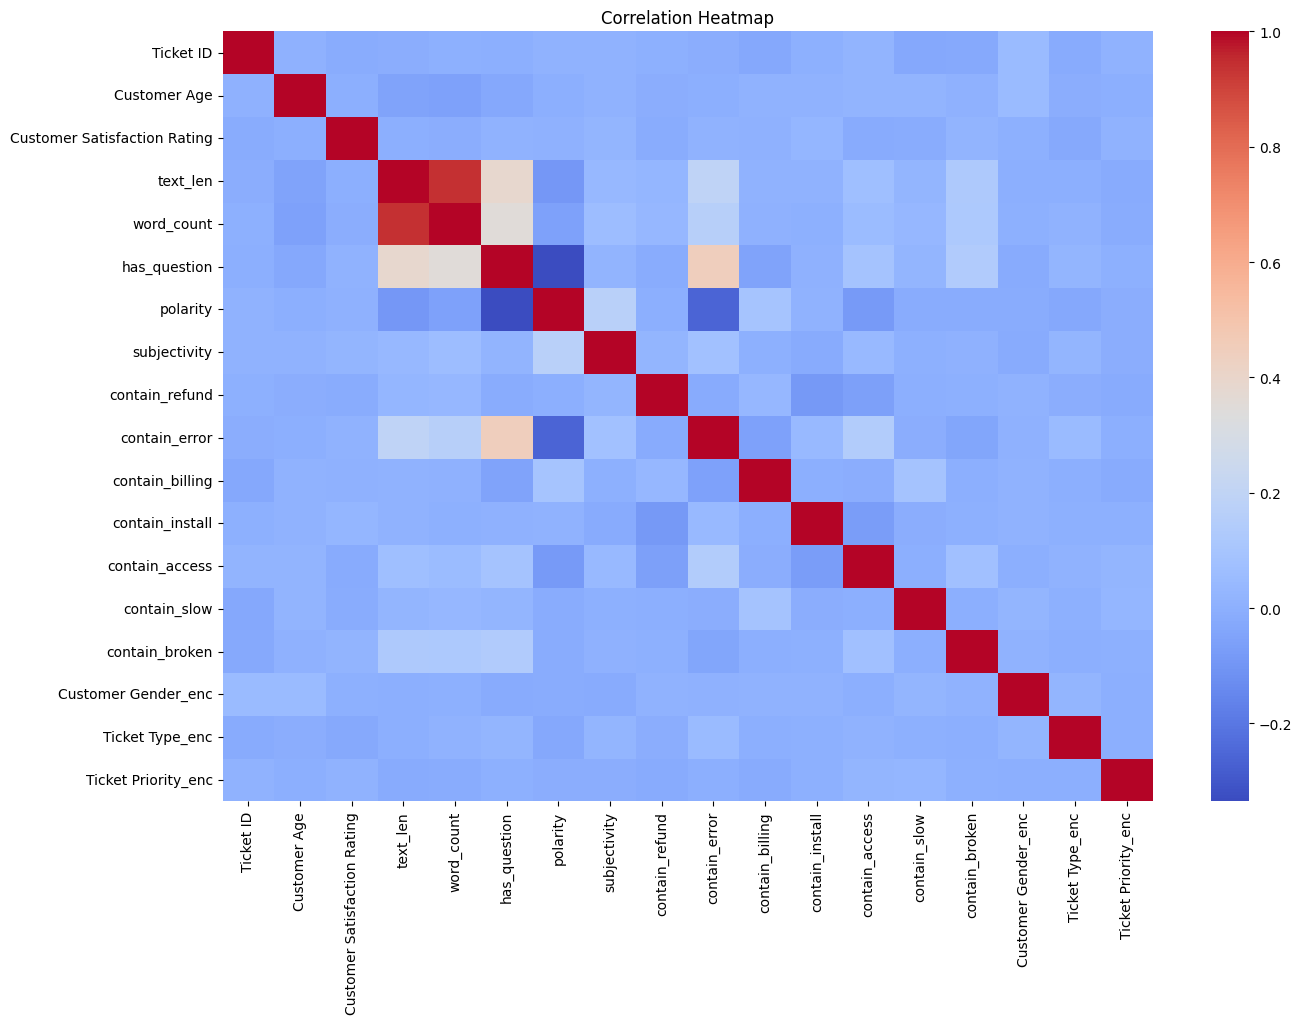

In [33]:
# print("Dataset Shape:", data.shape)
# display(data.head())
# display(data.describe().T)

# # 1. Missing Value Heatmap
# plt.figure(figsize=(10,4))
# sns.heatmap(data.isnull(), cbar=False, yticklabels=False)
# plt.title("Missing Value Heatmap")
# plt.show()

# # 2. Numerical Columns
num_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
# print("\nNumerical Columns:", num_cols)

# # Distribution of numerical features
# data[num_cols].hist(figsize=(14,8), bins=25)
# plt.suptitle("Numerical Feature Distributions", fontsize=14)
# plt.show()

# 3. Correlation Matrix (Heatmap)
plt.figure(figsize=(15,10))
corr = data[num_cols].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# # print strongest correlations
# corr_pairs = corr.unstack().sort_values(ascending=False)
# print("\nTop correlated numerical feature pairs:")
# display(corr_pairs[(corr_pairs < 1) & (corr_pairs > 0.4)].head(10))

# print("\n🎉 EDA Completed!")


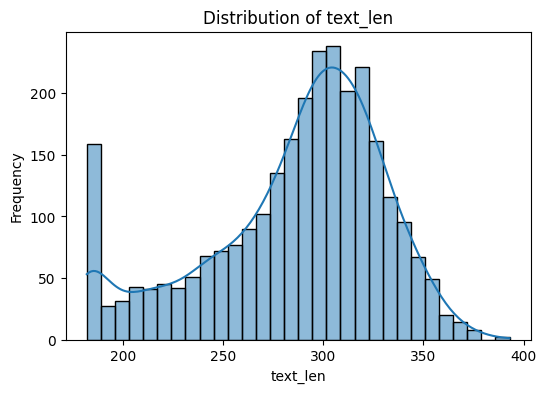

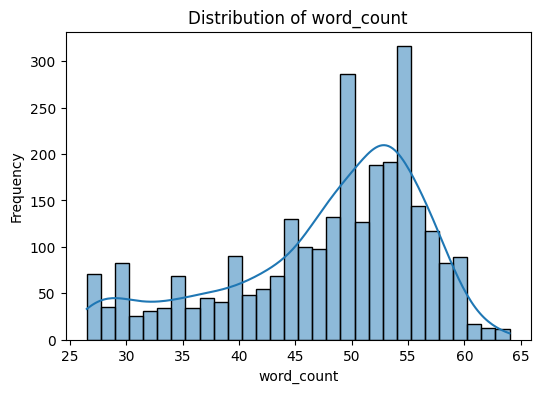

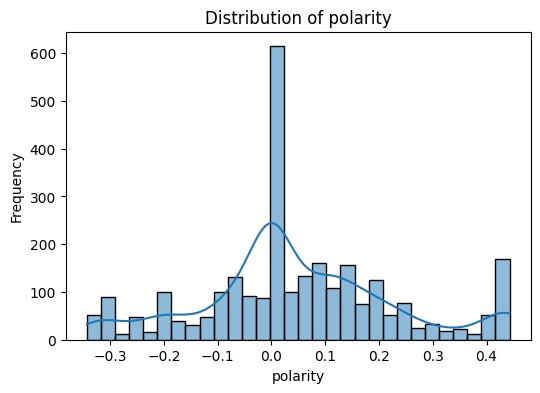

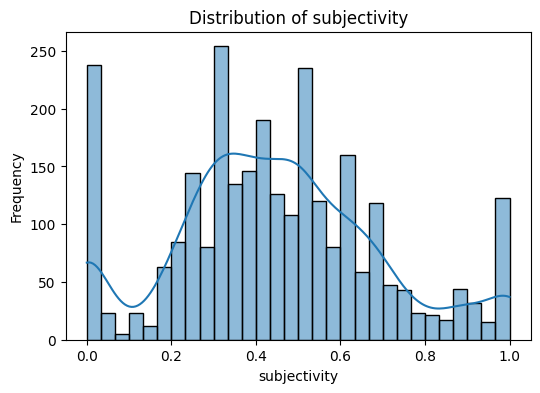

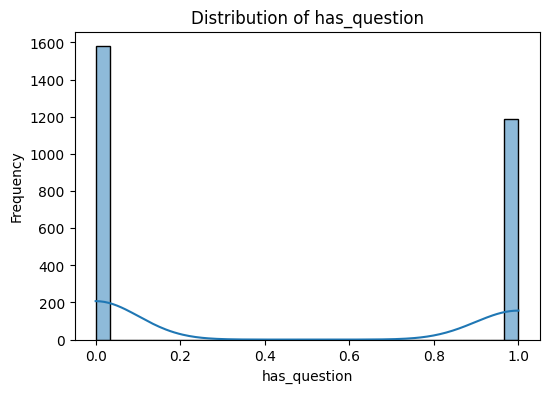

In [34]:
numeric_cols = ['text_len','word_count','polarity','subjectivity','has_question']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


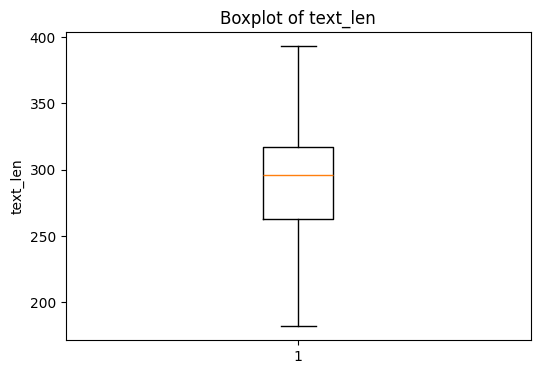

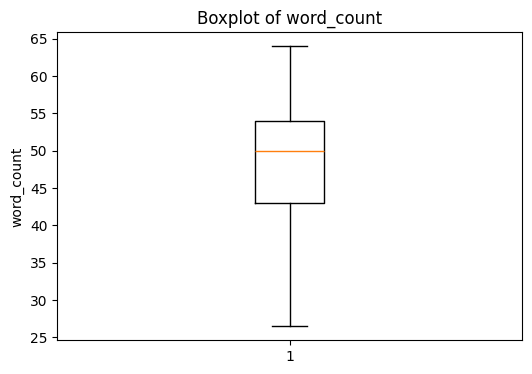

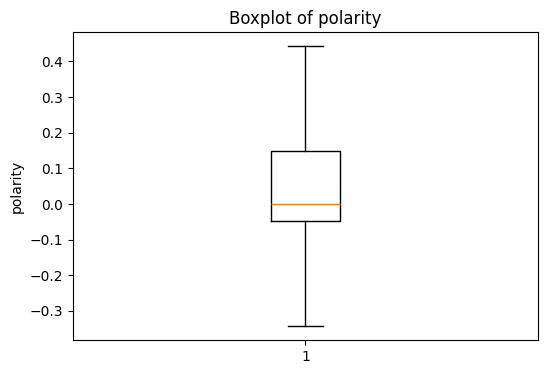

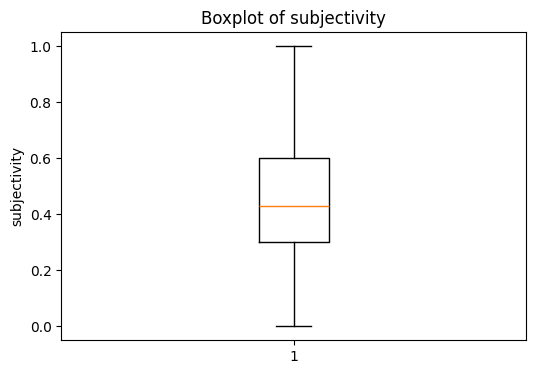

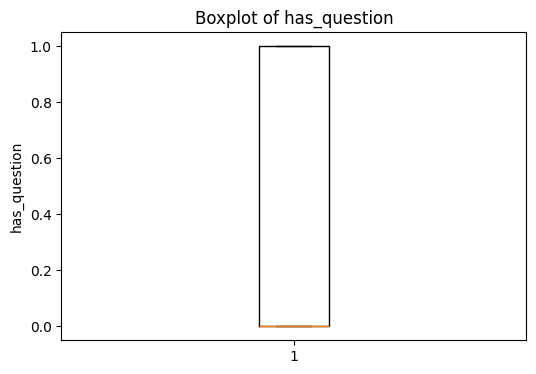

In [35]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(data[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

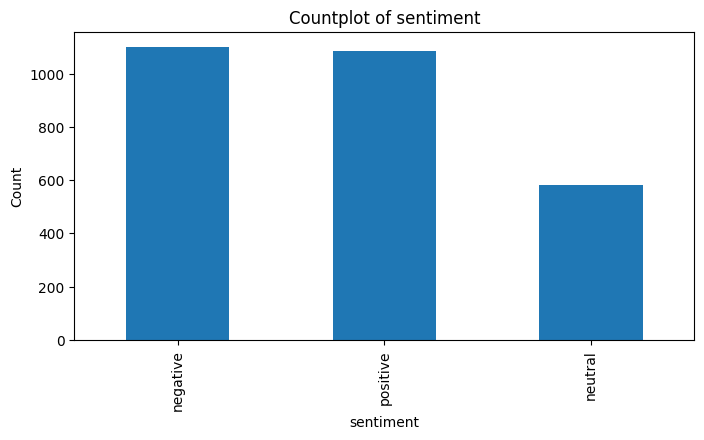

In [36]:
cat_cols = ["sentiment"]

for col in cat_cols:
    plt.figure(figsize=(8,4))
    data[col].value_counts().plot(kind="bar")
    plt.title(f"Countplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

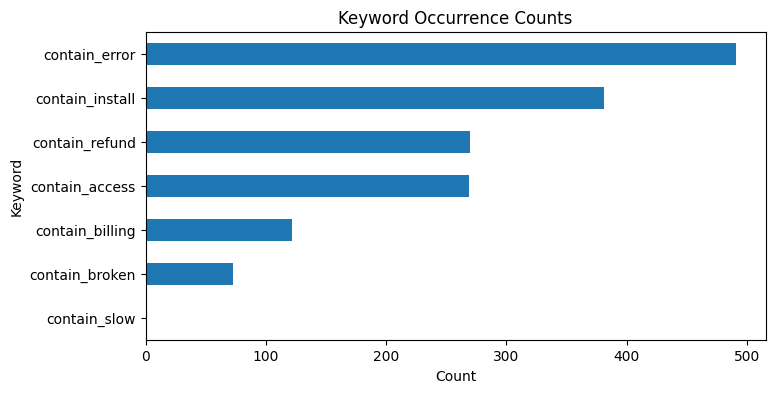

In [37]:
# Keyword flag columns (auto-detected)
keyword_cols = [c for c in data.columns if c.startswith("contain_")]

plt.figure(figsize=(8,4))
data[keyword_cols].sum().sort_values().plot(kind='barh')
plt.title("Keyword Occurrence Counts")
plt.xlabel("Count")
plt.ylabel("Keyword")
plt.show()

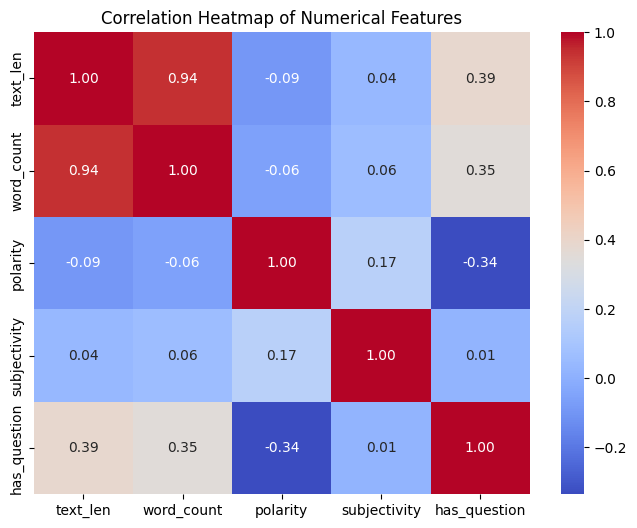

In [38]:
numeric_cols = ['text_len','word_count','polarity','subjectivity','has_question']

corr = data[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


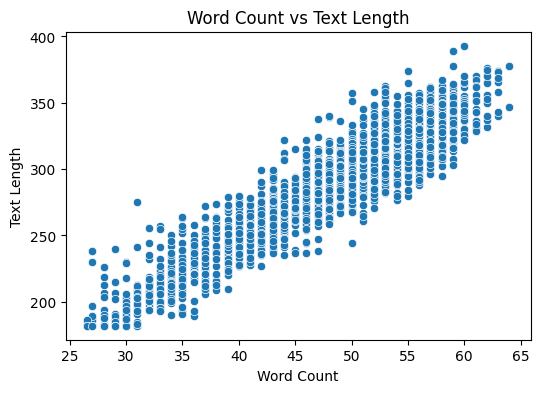

In [39]:
#It shows relationship between how long these messages are
plt.figure(figsize=(6,4))
sns.scatterplot(x=data['word_count'], y=data['text_len'])
plt.title("Word Count vs Text Length")
plt.xlabel("Word Count")
plt.ylabel("Text Length")
plt.show()

12. Decide X and Y,train test split

In [50]:
# Target column
y = data["sentiment"]     # DO NOT subtract 1 !!

# Features = everything except unwanted columns
drop_cols = ["sentiment", "Ticket ID", "Customer Name", "Customer Email", "text"]
drop_cols = [c for c in drop_cols if c in data.columns]

X = data.drop(columns=drop_cols)

print("Number of features:", X.shape[1])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Number of features: 31


13. Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
import joblib
import os
import numpy as np

os.makedirs("models", exist_ok=True)

num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns scaled:", num_cols)

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Save scaler
joblib.dump(scaler, "models/scaler.joblib")

print("Scaling complete.")


Numeric columns scaled: ['Customer Age', 'Customer Satisfaction Rating', 'text_len', 'word_count', 'has_question', 'polarity', 'subjectivity', 'contain_refund', 'contain_error', 'contain_billing', 'contain_install', 'contain_access', 'contain_slow', 'contain_broken', 'Customer Gender_enc', 'Ticket Type_enc', 'Ticket Priority_enc']
Scaling complete.


15. Train the Algorithm with all the models and choose best one

In [54]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "Decision Tree": DecisionTreeClassifier(max_depth=10),
    "Random Forest": RandomForestClassifier(n_estimators=400, max_depth=12),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="multi:softmax",
        eval_metric="mlogloss"
    ),
    "SVM": SVC(kernel='rbf', C=3)
}

16. Prediction and statistical Outcomes

In [58]:

# Select numeric columns from X_train (this includes one-hot encoded columns)
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns used:", numeric_cols)

# Create numeric train/test matrices
X_train_num = X_train[numeric_cols].copy()
X_test_num  = X_test[numeric_cols].copy()

# Encode labels (safe for all models)
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

# Simple training loop (your style)
result = {}
for name, model in models.items():
    print(f"\nTraining {name} ...")
    model.fit(X_train_num, y_train_enc)
    y_pred_test = model.predict(X_test_num)
    y_pred_train = model.predict(X_train_num)

    acc_test  = accuracy_score(y_test_enc, y_pred_test)
    acc_train = accuracy_score(y_train_enc, y_pred_train)
    f1_test   = f1_score(y_test_enc, y_pred_test, average='weighted')
    f1_train  = f1_score(y_train_enc, y_pred_train, average='weighted')

    print(f"{name} — Training Acc: {acc_train:.4f}, Testing Acc: {acc_test:.4f}")
    print(f"{name} — Training F1:  {f1_train:.4f}, Testing F1:  {f1_test:.4f}")

    result[name] = {'train_acc': acc_train, 'test_acc': acc_test, 'f1_train': f1_train, 'f1_test': f1_test}


Numeric columns used: ['Customer Age', 'Customer Satisfaction Rating', 'text_len', 'word_count', 'has_question', 'polarity', 'subjectivity', 'contain_refund', 'contain_error', 'contain_billing', 'contain_install', 'contain_access', 'contain_slow', 'contain_broken', 'Customer Gender_enc', 'Ticket Type_enc', 'Ticket Priority_enc']

Training Logistic Regression ...
Logistic Regression — Training Acc: 1.0000, Testing Acc: 1.0000
Logistic Regression — Training F1:  1.0000, Testing F1:  1.0000

Training KNN ...
KNN — Training Acc: 0.8569, Testing Acc: 0.8069
KNN — Training F1:  0.8496, Testing F1:  0.7918

Training Decision Tree ...
Decision Tree — Training Acc: 1.0000, Testing Acc: 1.0000
Decision Tree — Training F1:  1.0000, Testing F1:  1.0000

Training Random Forest ...
Random Forest — Training Acc: 1.0000, Testing Acc: 1.0000
Random Forest — Training F1:  1.0000, Testing F1:  1.0000

Training Gradient Boosting ...
Gradient Boosting — Training Acc: 1.0000, Testing Acc: 1.0000
Gradient Bo

In [44]:
result_data = pd.DataFrame.from_dict(result, orient='index').reset_index()
result_data = result_data.rename(columns={'index': 'model'})
display(result_data[['model','train_acc','test_acc']])

best_model_name = None
best_acc = -1.0

for name, metrics_dict in result.items():
    # Directly access f1_test from the dictionary
    current_acc_score = metrics_dict['test_acc']

    if current_acc_score > best_acc:
        best_acc = current_acc_score
        best_model_name = name

print(f"\nBest performing model: {best_model_name}")
print(f"Highest Accuracy Score: {best_acc:.4f}")


# Get predictions for the best model to print classification reports
best_model_obj = models[best_model_name]
y_train_pred_best = best_model_obj.predict(X_train)
y_test_pred_best = best_model_obj.predict(X_test)


# Metrics for the best model
print("\n--- Train Classification Report ---")
print(classification_report(y_train, y_train_pred_best))
print("\n--- Test Classification Report ---")
print(classification_report(y_test, y_test_pred_best))

,model,train_acc,test_acc
0,Logistic Regression,0.988713,0.989170
1,KNN,0.562980,0.366426
2,Decision Tree,1.000000,1.000000
3,Random Forest,1.000000,1.000000
4,Gradient Boosting,1.000000,1.000000
5,XGBoost,1.000000,1.000000
6,SVM,0.413093,0.386282



Best performing model: Decision Tree
Highest Accuracy Score: 1.0000


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Customer Email
- Customer Gender
- Customer Name
- Date of Purchase
- First Response Time
- ...
